### Object_Detection_Basics_YOLO_OWL-ViT.ipynb
Das Notebook konzentriert sich auf die Grundlagen der Objekt-Erkennung mit zwei Modellen:
1. **YOLO (You Only Look Once)**:
   - Ein modernes Echtzeit-Objekterkennungsmodell, das Objekte in Bildern oder Videos lokalisiert und kategorisiert.
   - Das Notebook enthält wahrscheinlich Code zur Vorbereitung und Ausführung des YOLO-Modells, inklusive Datenvorverarbeitung, Modellaufruf und Visualisierung der Ergebnisse.

2. **OWL-ViT (Open-World Vision Transformer)**:
   - Ein fortschrittliches "Zero-Shot"-Objekterkennungsmodell von Google, das auch Objekte erkennt, für die es nicht explizit trainiert wurde.
   - Das Notebook verwendet das OWL-ViT-Modell wahrscheinlich, um textbasierte Objekterkennungsaufgaben durchzuführen, indem es spezifische Beschreibungen wie "a dog near market stalls" als Eingabe akzeptiert.

### **Was ist YOLO?**
**YOLO (You Only Look Once)** ist ein Algorithmus zur Objekterkennung, der folgende Eigenschaften hat:
1. **Schnelligkeit und Effizienz**:
   - Im Gegensatz zu älteren Algorithmen (z. B. R-CNN) analysiert YOLO das Bild in einem einzigen Durchlauf.
   - Es teilt das Bild in Raster auf und prognostiziert für jedes Raster:
     - Objekte, die es enthält.
     - Die Bounding-Box-Koordinaten und die Wahrscheinlichkeiten (Scores) der erkannten Klassen.

2. **Anwendungen**:
   - Wird häufig in Echtzeitanwendungen eingesetzt, z. B. für Überwachungskameras, autonome Fahrzeuge und Roboter.

3. **Versionen**:
   - YOLO hat mehrere Versionen (YOLOv1 bis YOLOv8), die sich in Genauigkeit und Geschwindigkeit verbessern.

---

### **Was ist OWL-ViT?**
**OWL-ViT (Open-World Vision Transformer)** ist ein "Zero-Shot"-Objekterkennungsmodell von Google mit folgenden Eigenschaften:
1. **Transformer-basiert**:
   - Nutzt die Architektur von Vision Transformers (ViT), die Bildinformationen in Form von Patches verarbeitet.
   - Besonders geeignet für große Datensätze und offene Aufgabenstellungen.

2. **Zero-Shot-Objekterkennung**:
   - Kann Objekte erkennen, die nicht explizit im Trainingsdatensatz enthalten waren.
   - Verwendet Textbeschreibungen (z. B. "a person riding a bicycle"), um nach spezifischen Objekten zu suchen.

3. **Flexibilität**:
   - OWL-ViT kann auch ohne spezifisches Training auf benutzerdefinierte Aufgaben angewendet werden.
   - Besonders nützlich für Szenarien, in denen die Zielobjekte nicht im Voraus bekannt sind.

---

### **Vergleich YOLO vs. OWL-ViT**
| Merkmal                  | YOLO                                   | OWL-ViT                                   |
|--------------------------|----------------------------------------|------------------------------------------|
| **Trainingsdaten**       | Benötigt spezifisches Training für Klassen. | Zero-Shot-fähig, erfordert keine spezifischen Trainingsdaten. |
| **Eingaben**             | Bild-Input.                           | Bild- und Text-Input.                    |
| **Schnelligkeit**        | Sehr schnell, geeignet für Echtzeitanwendungen. | Langsamer, aber flexibler für offene Szenarien. |
| **Anwendungsbereiche**  | Überwachung, autonome Fahrzeuge, etc.  | Forschungsanwendungen, benutzerdefinierte Aufgaben. |
| **Modelarchitektur**     | CNN-basiert.                          | Transformer-basiert.                     |

#### 1. Object Detection Inference?
Object Detection Inference bezeichnet den Prozess, bei dem ein vortrainiertes Objekterkennungsmodell verwendet wird, um Objekte in neuen, bisher ungesehenen Bildern oder Videos zu identifizieren, ihre Position zu lokalisieren und ihre Kategorien vorherzusagen.

In [3]:
# Import YOLO and load a pre-trained model
from ultralytics import YOLO
import cv2

# Load the YOLOv8 pre-trained model
model = YOLO('yolov8n.pt')  # Lädt das YOLOv8 Nano-Modell (klein und schnell, aber weniger genau)

# Run inference on a sample image
# Führt die Objekterkennung auf dem Bild 'test.jpg' aus
# save=False bedeutet, dass die Ausgabe nicht als Datei gespeichert wird
results = model('images/test.jpg', save=False)

# Iterate through the results
for result in results:  # Geht durch jedes Ergebnis (für jedes analysierte Bild)
    print(result.boxes)  # Gibt die Bounding-Boxen für die erkannten Objekte im Bild aus
    # Die Bounding-Boxen enthalten Informationen wie:
    # - Koordinaten (xmin, ymin, xmax, ymax)
    # - Erkannte Objektklasse (z. B. 0 = Person, 1 = Fahrrad)
    # - Konfidenzscore (z. B. wie sicher das Modell ist, dass es richtig erkannt wurde)


image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/test.jpg: 640x640 14 persons, 2 bicycles, 2 traffic lights, 1 dog, 7 umbrellas, 3 apples, 107.7ms
Speed: 2.1ms preprocess, 107.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 1.,  0.,  0.,  9.,  1.,  9.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.,  0., 25., 25., 47.,  0., 16.,  0.,  0., 25., 47., 25., 25., 25.,  0., 47.])
conf: tensor([0.8608, 0.8423, 0.8116, 0.7766, 0.7623, 0.7086, 0.7060, 0.6901, 0.6840, 0.6773, 0.6711, 0.6709, 0.6598, 0.6534, 0.6164, 0.5425, 0.5369, 0.4658, 0.4565, 0.4355, 0.4235, 0.4074, 0.4065, 0.3933, 0.3914, 0.3887, 0.3816, 0.3144, 0.2615])
data: tensor([[7.1088e+02, 5.8263e+02, 9.5298e+02, 7.1567e+02, 8.6085e-01, 1.0000e+00],
        [6.0410e+02, 4.7645e+02, 7.0507e+02, 7.4107e+02, 8.4230e-01, 0.0000e+00],
        [4.8730e+02, 4.7322e+02, 5.7820e+02, 7.2263e+02, 8.1164e-01, 0.0000e+00],
        [7.1769e+02, 1.7167e+

### Finetuning YOLO

In [4]:
# Download an alternative dataset (e.g., COCO-Tiny Subset)
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/coco8.zip
!unzip -q coco8.zip -d ./datasets

# Hinweis:
# coco8 ist eine kleine Version des COCO-Datasets, die für Tests und schnelle Inferenz geeignet ist.
# Es enthält wenige Bilder mit Labels wie "Person", "Auto", "Fahrrad" etc.


In [6]:
# Train YOLO on the dataset
results = model.train(data='./datasets/coco8.yaml', epochs=3, imgsz=640, batch=16)

New https://pypi.org/project/ultralytics/8.3.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.39 🚀 Python-3.10.15 torch-2.5.1+cu124 CPU (AMD EPYC 7763 64-Core Processor)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./datasets/coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /workspaces/MultimodalInteraction_ObjDet/datasets/coco8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 609.06it/s]

train: New cache created: /workspaces/MultimodalInteraction_ObjDet/datasets/coco8/labels/train.cache



val: Scanning /workspaces/MultimodalInteraction_ObjDet/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2969.42it/s]

val: New cache created: /workspaces/MultimodalInteraction_ObjDet/datasets/coco8/labels/val.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      2.791      5.531      2.751         22        640: 100%|██████████| 1/1 [00:01<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all          4         17      0.204     0.0167    0.00535    0.00269



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G       2.85        5.7      2.666         23        640: 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all          4         17    0.00073     0.0833    0.00128   0.000245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      3.003      6.244      2.865         16        640: 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all          4         17   0.000428       0.05   0.000561   0.000179



3 epochs completed in 0.002 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.5MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.39 🚀 Python-3.10.15 torch-2.5.1+cu124 CPU (AMD EPYC 7763 64-Core Processor)
Model summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


                   all          4         17      0.204     0.0167    0.00535    0.00269
                person          3         10      0.223        0.1     0.0321     0.0161
                   dog          1          1          1          0          0          0
                 horse          1          2          0          0          0          0
              elephant          1          2          0          0          0          0
              umbrella          1          1          0          0          0          0
          potted plant          1          1          0          0          0          0
Speed: 0.8ms preprocess, 99.0ms inference, 0.0ms loss, 18.2ms postprocess per image
Results saved to runs/detect/train4


In [8]:
# Lade das trainierte YOLO-Modell
# Der Pfad "runs/detect/train4/weights/best.pt" zeigt auf die besten Gewichte, 
# die während des Trainings gespeichert wurden.
# Dieses Modell ist jetzt bereit, um neue Bilder zu analysieren.
model = YOLO("runs/detect/train4/weights/best.pt")

# Vorhersage auf einem neuen Bild durchführen
# Das Bild "images/test.jpg" wird analysiert, um Objekte zu erkennen.
# Parameter:
# - conf=0.75: Nur Objekte mit einer Konfidenz von mindestens 75% werden als erkannt ausgegeben.
# - Ergebnis: Bounding-Boxen, erkannte Objektklassen und Konfidenzwerte.
results = model.predict("images/test.jpg", conf=0.75)



image 1/1 /workspaces/MultimodalInteraction_ObjDet/images/test.jpg: 640x640 (no detections), 95.0ms
Speed: 2.0ms preprocess, 95.0ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


Kein Objekt erkannt:
Das Modell konnte im Bild test.jpg keine Objekte finden, die seiner Trainingsklasse entsprechen oder die über der Konfidenzschwelle lagen.
Bildprozessierung:
Das Bild wurde auf 640x640 Pixel skaliert.
Zeiten:
Das Modell hat 95ms für die eigentliche Objekterkennung benötigt, was für YOLOv8 Nano sehr schnell ist.

# 3. Zero-Shot Learning with OWL-ViT

Wenn BIld nicht angezegit: %matplotlib inline

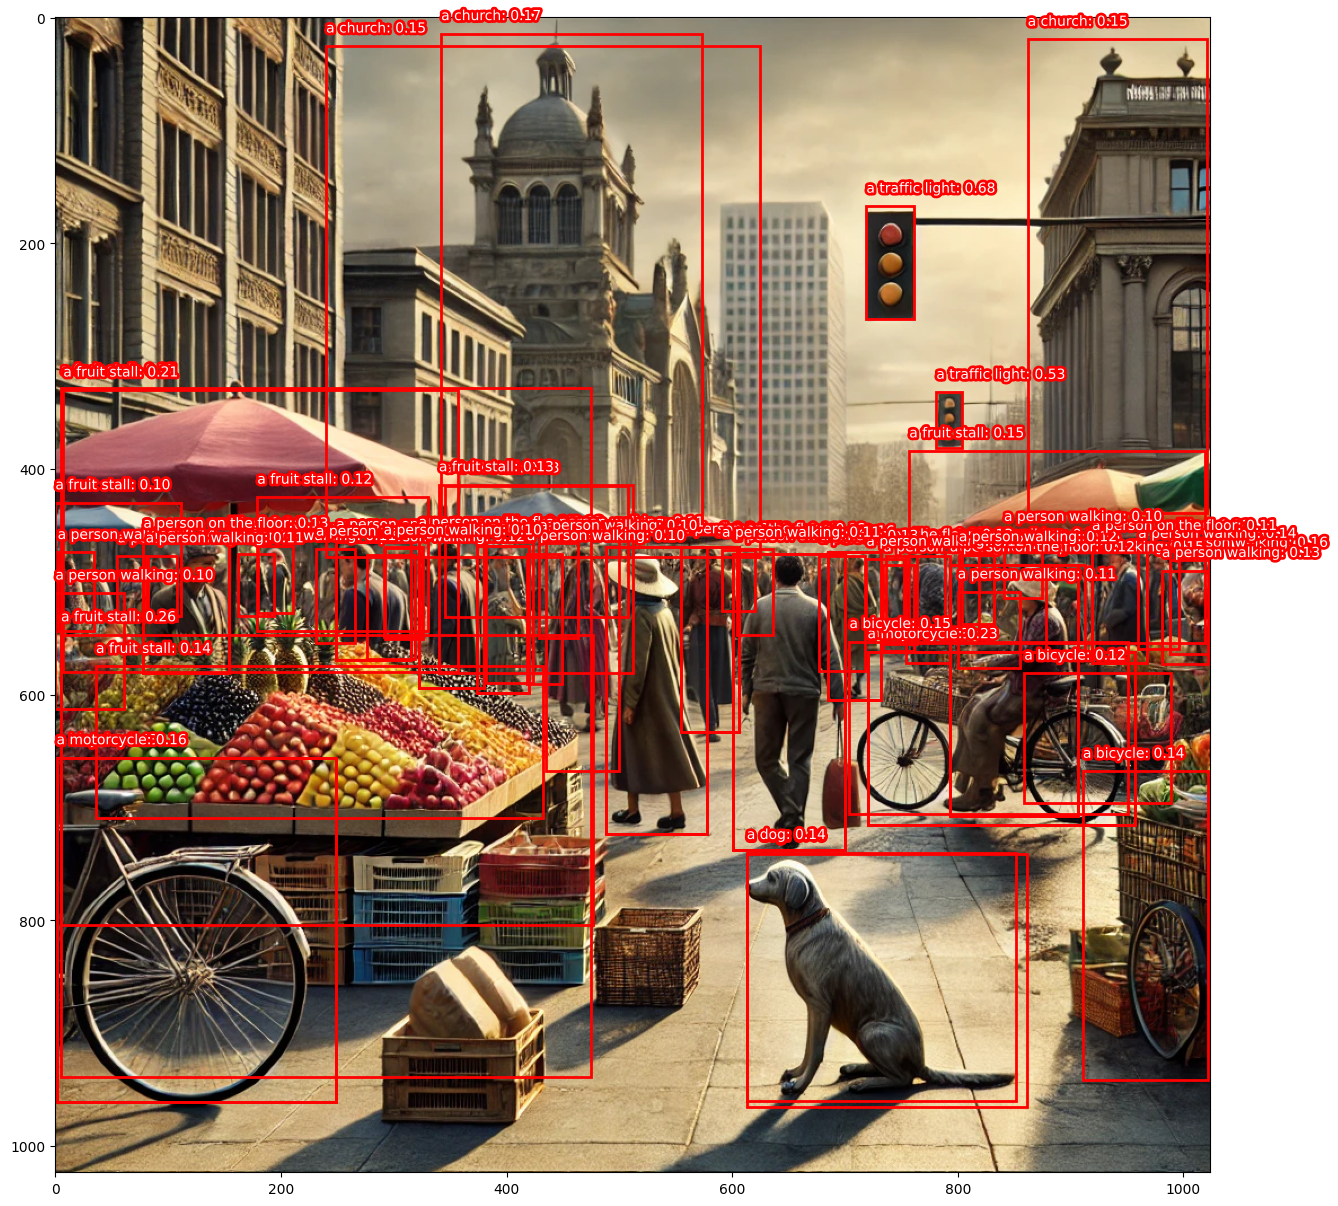

In [11]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import torch
from transformers import pipeline

# Bild laden
image_path = "/workspaces/MultimodalInteraction_ObjDet/images/test.jpg"
image = Image.open(image_path)

# Funktion zur Verarbeitung der Bounding-Boxen und Ausgaben
def preprocess_outputs(output):
    input_scores = [x["score"] for x in output]
    input_labels = [x["label"] for x in output]
    input_boxes = []
    for i in range(len(output)):
        input_boxes.append([*output[i]["box"].values()])
    input_boxes = [input_boxes]
    return input_scores, input_labels, input_boxes

# Funktion zum Zeichnen einer Box
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(
        plt.Rectangle((x0, y0), w, h, edgecolor="red", facecolor=(0, 0, 0, 0), lw=2)
    )

# Funktion zur Visualisierung der Boxen und Labels
def show_boxes_and_labels_on_image(raw_image, boxes, labels, scores):
    plt.figure(figsize=(15, 15))
    plt.imshow(raw_image)
    for i, box in enumerate(boxes):
        show_box(box, plt.gca())
        plt.text(
            x=box[0],
            y=box[1] - 12,
            s=f"{labels[i]}: {scores[i]:,.2f}",  # Anzeige von Label und Score
            c="white",
            path_effects=[pe.withStroke(linewidth=4, foreground="red")],
        )
    plt.axis("on")
    plt.show()

# Definiere die zu erkennenden Objekte
OWL_checkpoint = "google/owlvit-base-patch32"
text = [
    "a car",
    "a traffic light",
    "a bicycle",
    "a motorcycle",
    "a person walking",
    "a person on the floor",
    "a dog",
    "a fruit stall",
    "a church"
]

# Modell laden und konfigurieren
detector = pipeline(
    model=OWL_checkpoint,
    task="zero-shot-object-detection"
)

# Detektion durchführen
output = detector(
    image,
    candidate_labels=text
)

# Verarbeite die Ausgaben
input_scores, input_labels, input_boxes = preprocess_outputs(output)

# Bild mit Bounding-Boxen und Labels visualisieren
show_boxes_and_labels_on_image(
    image,
    input_boxes[0],
    input_labels,
    input_scores
)


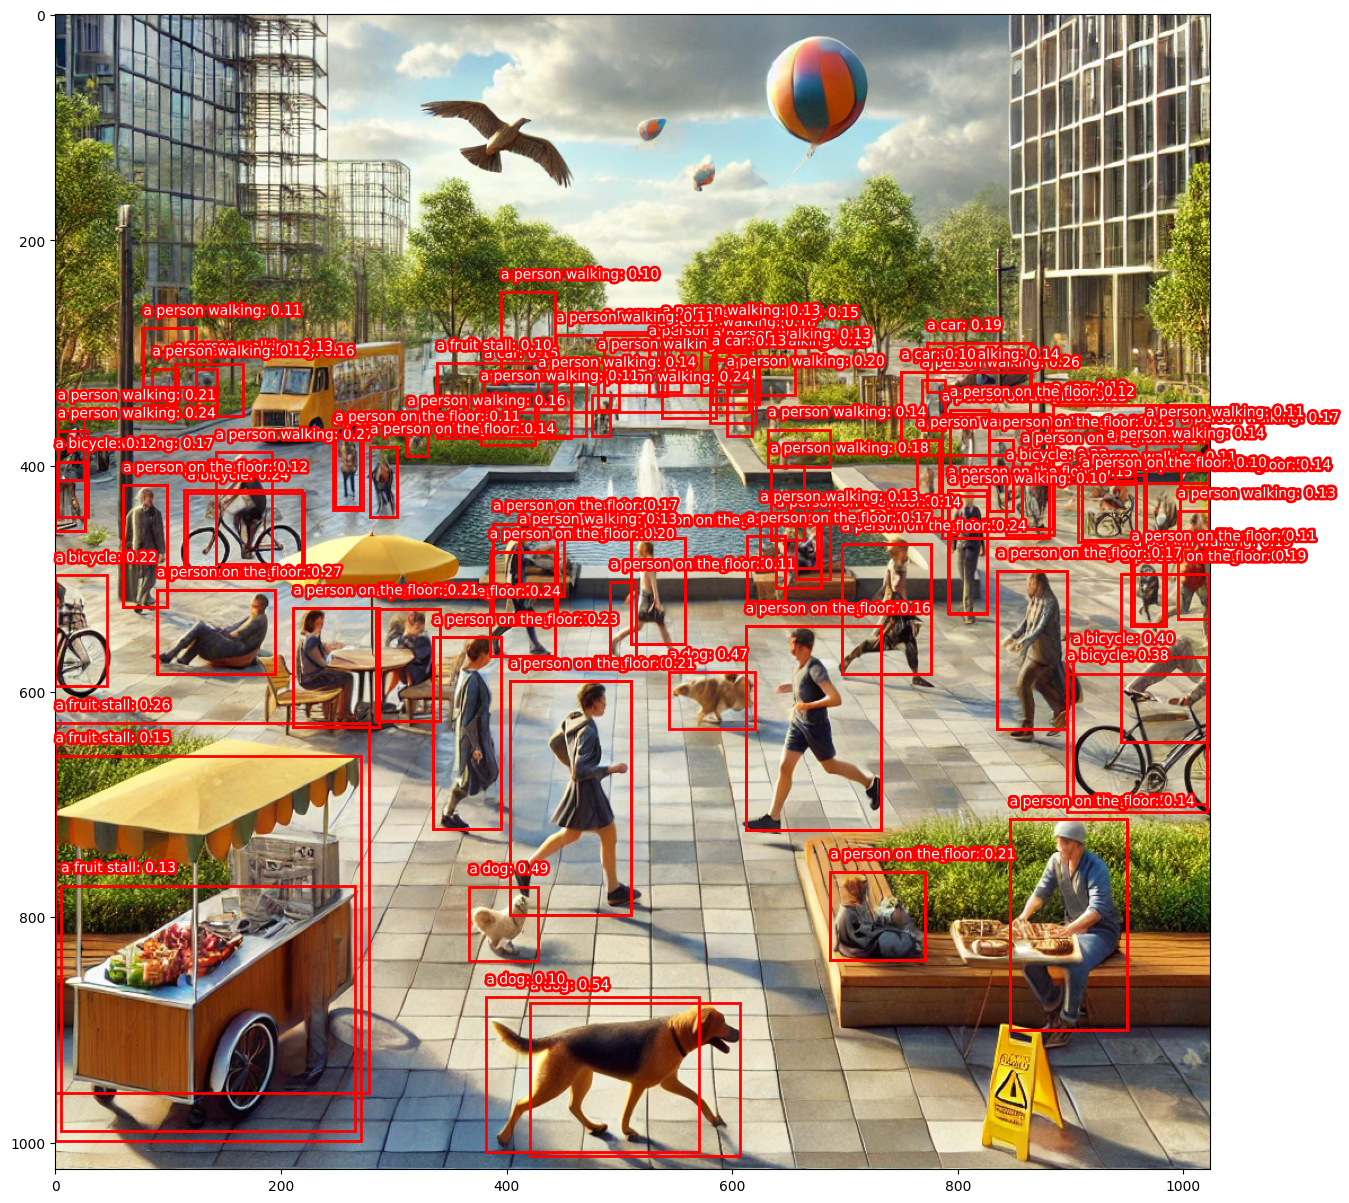

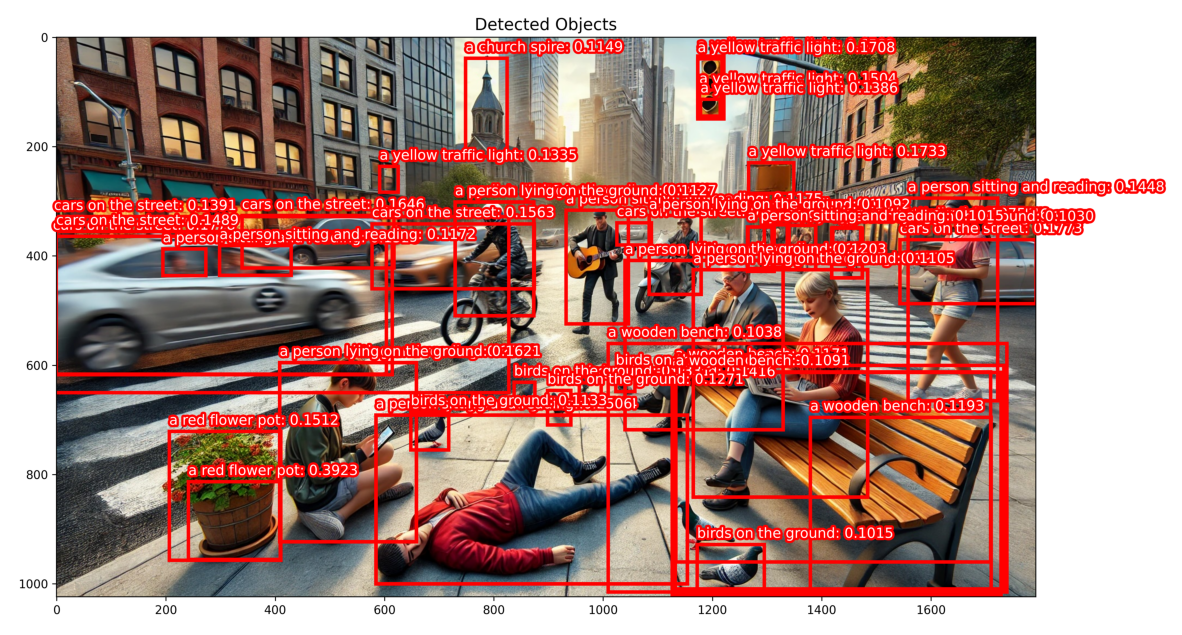

In [12]:
# Mit neuem Bild testen
new_image = Image.open("images/test2.jpg")

output = detector(
    new_image,
    candidate_labels = text
)

input_scores, input_labels, input_boxes = preprocess_outputs(output)

show_boxes_and_labels_on_image(
    new_image,
    input_boxes[0],
    input_labels,
    input_scores
)


# Gespeichertes Bild laden und anzeigen
detected_image = Image.open('detected_objects.png')
plt.figure(figsize=(15, 15))
plt.imshow(detected_image)
plt.axis('off')
plt.show()

THE END